### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Informasi umum dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Statistik deskriptif
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


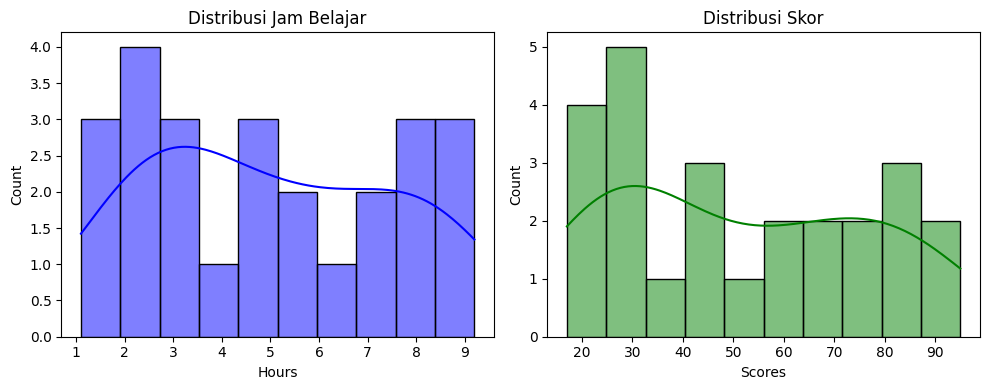

In [ ]:
# Distribusi Hours
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset['Hours'], kde=True, bins=10, color='blue')
plt.title('Distribusi Jam Belajar')

# Distribusi Scores
plt.subplot(1,2,2)
sns.histplot(dataset['Scores'], kde=True, bins=10, color='green')
plt.title('Distribusi Skor')

plt.tight_layout()
plt.show()

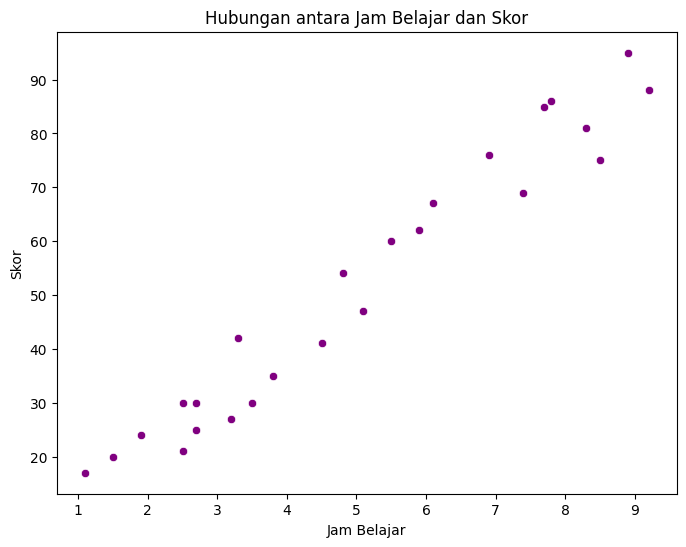

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Hours', y='Scores', data=dataset, color='purple')
plt.title('Hubungan antara Jam Belajar dan Skor')
plt.xlabel('Jam Belajar')
plt.ylabel('Skor')
plt.show()

Mengecek Data Duplikat

In [ ]:
# Mengecek jumlah data duplikat
duplicate_rows = dataset.duplicated()
print(f"Jumlah data duplikat: {duplicate_rows.sum()}")

# Menghapus data duplikat jika ada
dataset = dataset.drop_duplicates()
print("Dataset setelah menghapus duplikat:")

Jumlah data duplikat: 0
Dataset setelah menghapus duplikat:


In [ ]:
# Mengecek missing values
missing_values = dataset.isnull().sum()
print("Missing Values per Kolom:")
print(missing_values)

# Jika terdapat missing values, bisa diisi dengan metode tertentu
# Contoh: Mengisi missing values dengan mean
# dataset['Hours'].fillna(dataset['Hours'].mean(), inplace=True)
# dataset['Scores'].fillna(dataset['Scores'].mean(), inplace=True)


Missing Values per Kolom:
Hours     0
Scores    0
dtype: int64


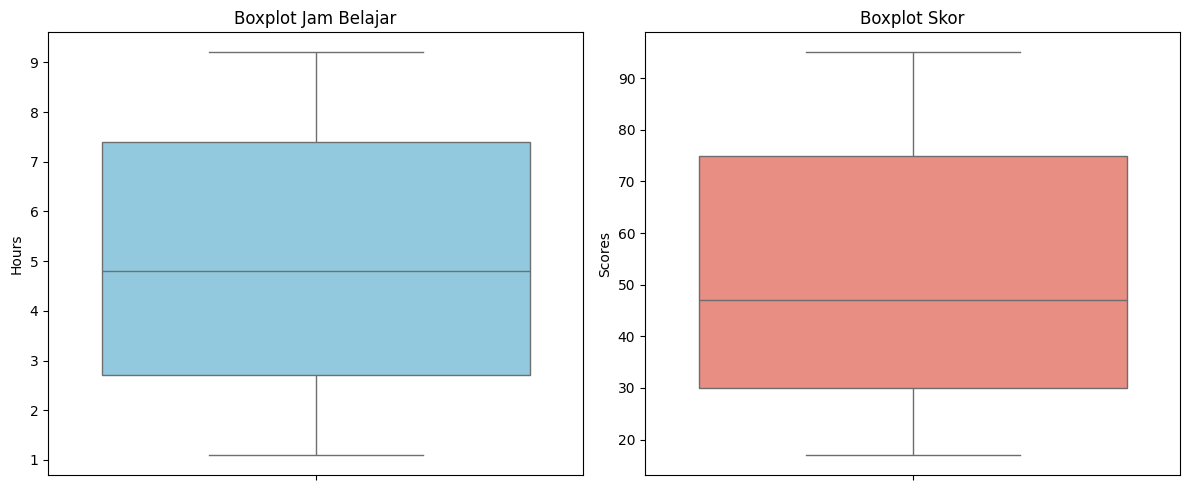

Jumlah outlier per kolom:
Hours     0
Scores    0
dtype: int64


In [ ]:
# Boxplot untuk Hours
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=dataset['Hours'], color='skyblue')
plt.title('Boxplot Jam Belajar')

# Boxplot untuk Scores
plt.subplot(1,2,2)
sns.boxplot(y=dataset['Scores'], color='salmon')
plt.title('Boxplot Skor')

plt.tight_layout()
plt.show()

# Menggunakan IQR untuk mendeteksi outlier
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Mendefinisikan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = ((dataset < lower_bound) | (dataset > upper_bound)).sum()
print("Jumlah outlier per kolom:")
print(outliers)

# Menghapus outlier jika diperlukan
# dataset = dataset[~((dataset['Hours'] < lower_bound['Hours']) | (dataset['Hours'] > upper_bound['Hours']))]
# dataset = dataset[~((dataset['Scores'] < lower_bound['Scores']) | (dataset['Scores'] > upper_bound['Scores']))]


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = dataset[['Hours']]
y = dataset['Scores']

# Membagi data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")


Jumlah data train: 20
Jumlah data test: 5


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model
lr_model = LinearRegression()

# Melatih model
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

# Evaluasi
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R-squared: {r2_lr:.2f}")


Linear Regression:
MAE: 3.92
MSE: 18.94
RMSE: 4.35
R-squared: 0.97


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model
dt_model = DecisionTreeRegressor(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

# Evaluasi
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R-squared: {r2_dt:.2f}")



Decision Tree Regressor:
MAE: 5.40
MSE: 31.70
RMSE: 5.63
R-squared: 0.95


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")



Random Forest Regressor:
MAE: 2.78
MSE: 13.05
RMSE: 3.61
R-squared: 0.98


In [ ]:
# Membuat DataFrame untuk perbandingan
evaluation = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MAE': [mae_lr, mae_dt, mae_rf],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf],
    'R-squared': [r2_lr, r2_dt, r2_rf]
})

print(evaluation)

                     Model       MAE        MSE      RMSE  R-squared
0        Linear Regression  3.920751  18.943212  4.352380   0.967806
1  Decision Tree Regressor  5.400000  31.700000  5.630275   0.946125
2  Random Forest Regressor  2.778000  13.045154  3.611808   0.977829


<ipython-input-17-d23b38023f3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=evaluation, palette='viridis')


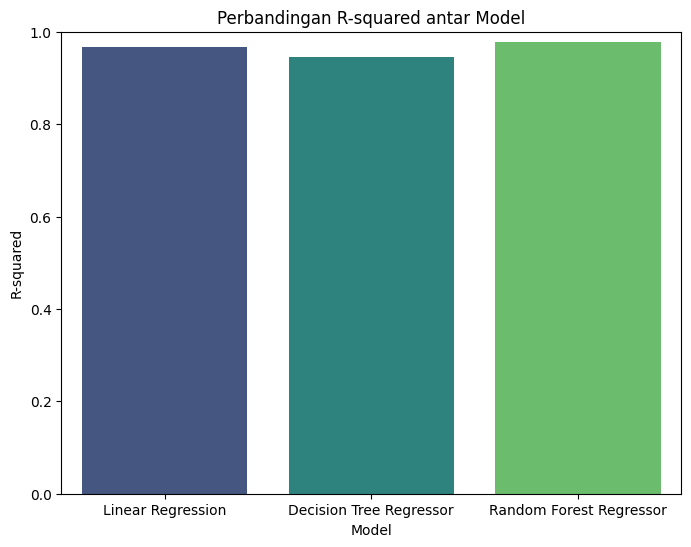

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='R-squared', data=evaluation, palette='viridis')
plt.title('Perbandingan R-squared antar Model')
plt.ylim(0,1)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()